In [1]:
import pandas as pd
import keras
from keras.models import Sequential,Model,Input
from keras.layers import Reshape, Dense,Dropout,Conv2D,Conv2DTranspose,BatchNormalization,Flatten
from keras.activations import relu
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam 
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [49]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [50]:
cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [2]:
from keras.datasets import mnist  
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
data=x_train

In [5]:
data.shape

(60000, 28, 28)

In [0]:
data=data.reshape((data.shape[0],28,28,1))

In [7]:
#normalzation this data
data=(data.astype("float32")-127.5)/127.5
print(np.max(data))
print(np.min(data)) 

1.0
-1.0


In [0]:
total_epochs=50
batch_size=256
No_of_Batch=int(data.shape[0]/batch_size)
helf_batch=int(batch_size/2)
Noise_dim=100
adam =Adam(lr=2e-4,beta_1=0.5)

In [60]:
#generator
genrator=Sequential()
genrator.add(Dense(7*7*128,input_shape=(Noise_dim,)))
genrator.add(Reshape((7,7,128)))
genrator.add(BatchNormalization())
genrator.add(LeakyReLU(0.2))
genrator.add(Conv2DTranspose(64,(5,5),padding='same',strides=(2,2),activation='relu'))
genrator.add(BatchNormalization())
genrator.add(LeakyReLU(0.2))
genrator.add(Conv2DTranspose(1,(5,5),padding='same',strides=(2,2),activation='tanh'))
genrator.compile(loss='binary_crossentropy',optimizer=adam)
genrator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)       

In [62]:
#Discriminatore
discriminatore=Sequential()
discriminatore.add(Conv2D(64,(5,5),strides=(2,2),padding="same",input_shape=(28,28,1)))
discriminatore.add(LeakyReLU(0.2))
discriminatore.add(Conv2D(128,(5,5),strides=(2,2),padding="same"))
discriminatore.add(LeakyReLU(0.2))
discriminatore.add(Flatten())
discriminatore.add(Dense(1,activation='sigmoid'))
discriminatore.compile(loss='binary_crossentropy',optimizer=adam)
discriminatore.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6273      
Total params: 212,865
Trainable params: 212,865
Non-trainable params: 0
________________________________________________

In [63]:
discriminatore.trainable=False
gan_input=Input(shape=(Noise_dim,))
generated_img=genrator(gan_input)
gan_output=discriminatore(generated_img)

model=Model(gan_input,gan_output)
model.compile(loss="binary_crossentropy",optimizer=adam)
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 28, 28, 1)         840705    
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 212865    
Total params: 1,053,570
Trainable params: 840,321
Non-trainable params: 213,249
_________________________________________________________________


In [0]:
!mkdir GAN_image

In [52]:
pwd

'/content/drive/My Drive/Colab Notebooks'

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epochs and loss 0 160.27646686136723 187.0389974117279


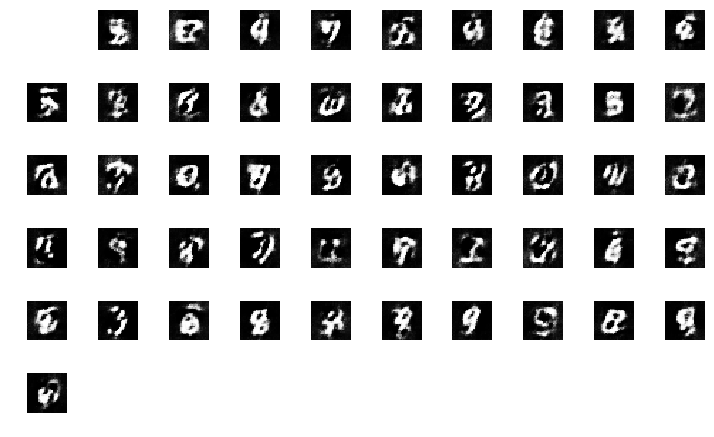

epochs and loss 1 161.07575005292892 192.67918068170547


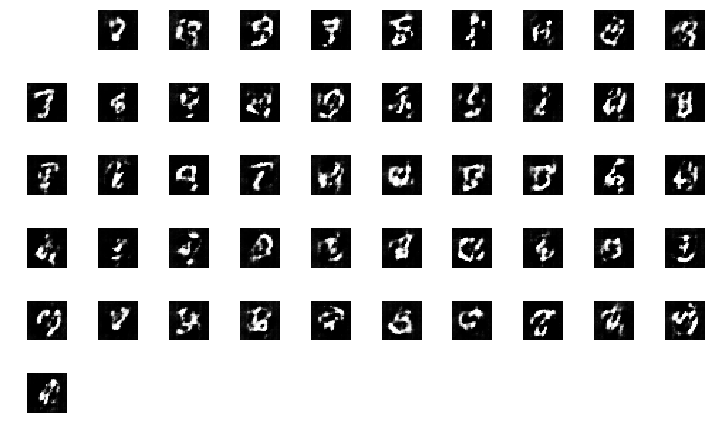

epochs and loss 2 160.0912400484085 195.6724744439125


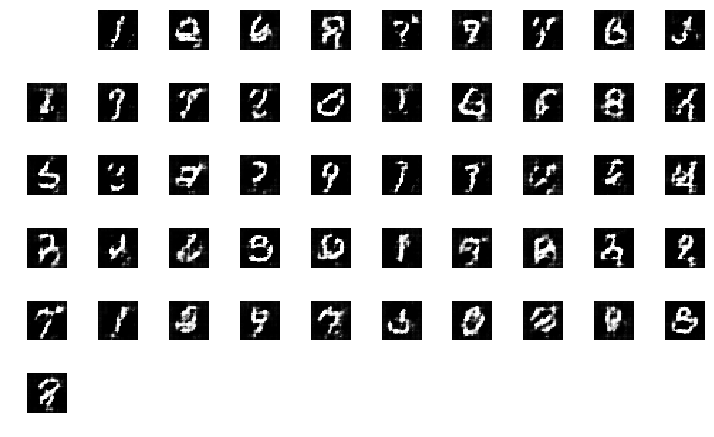

epochs and loss 3 160.7015056014061 194.87416625022888


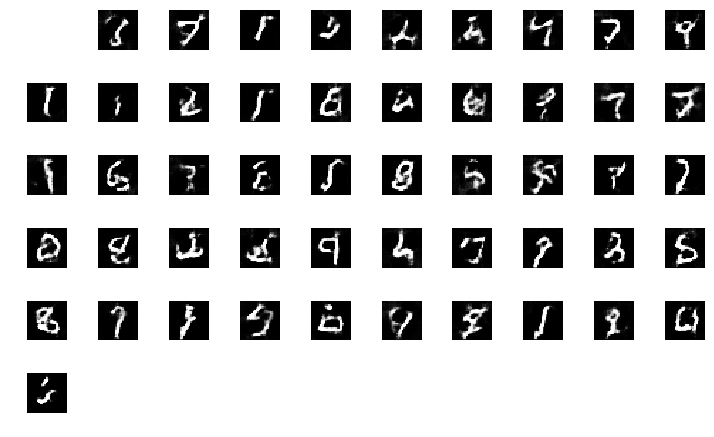

epochs and loss 4 161.09815114736557 192.1834555864334


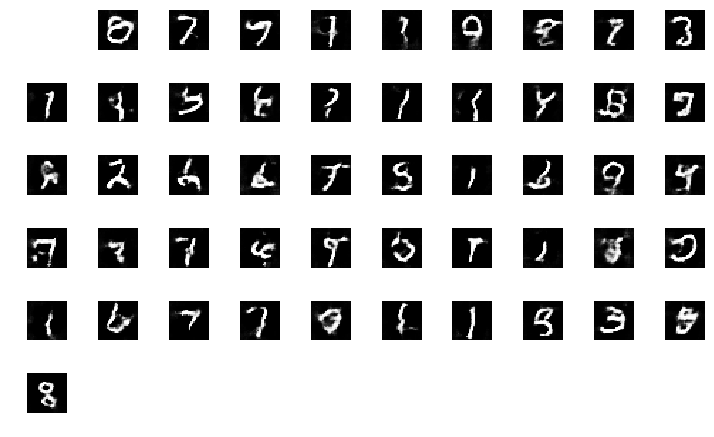

epochs and loss 5 161.19000262022018 191.12384033203125


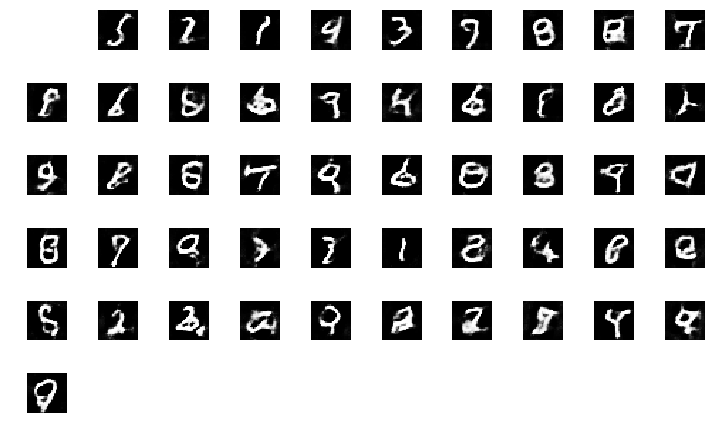

epochs and loss 6 161.05117845535278 191.68719851970673


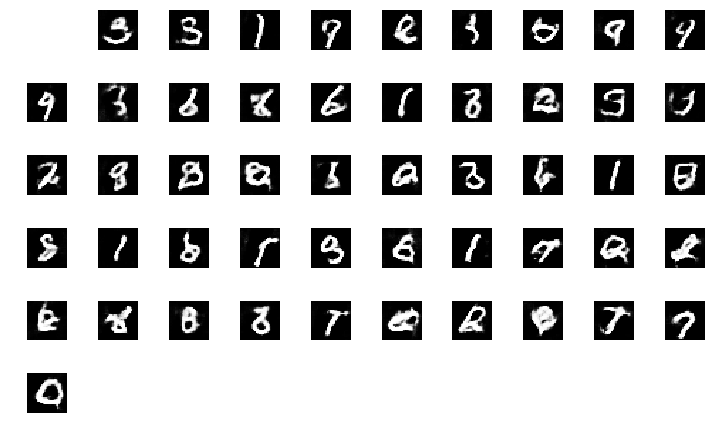

epochs and loss 7 160.8518781363964 191.7761777639389


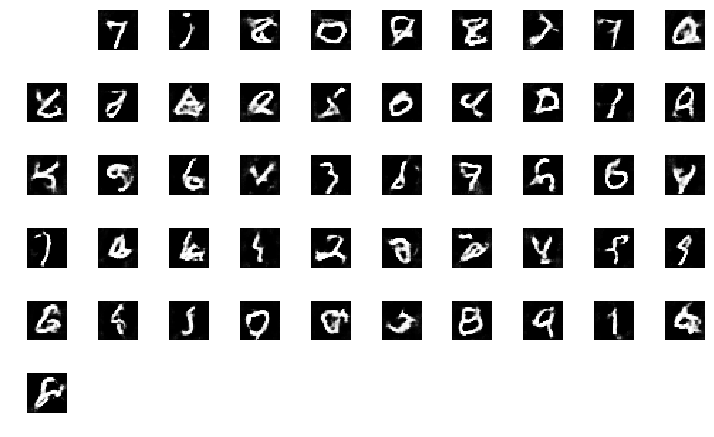

epochs and loss 8 160.8159468472004 191.75666469335556


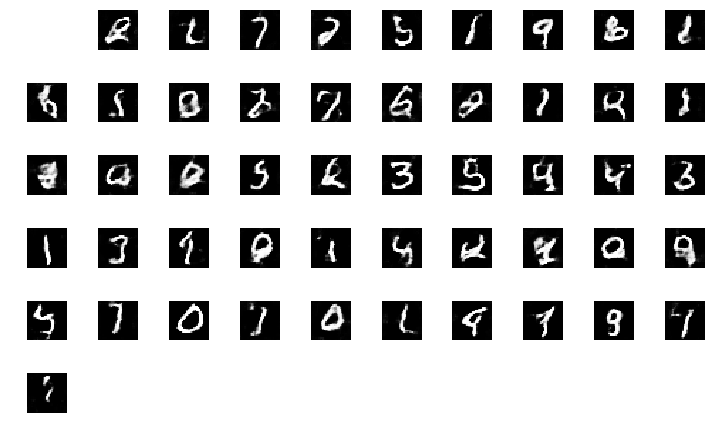

epochs and loss 9 160.75397044420242 191.69506347179413


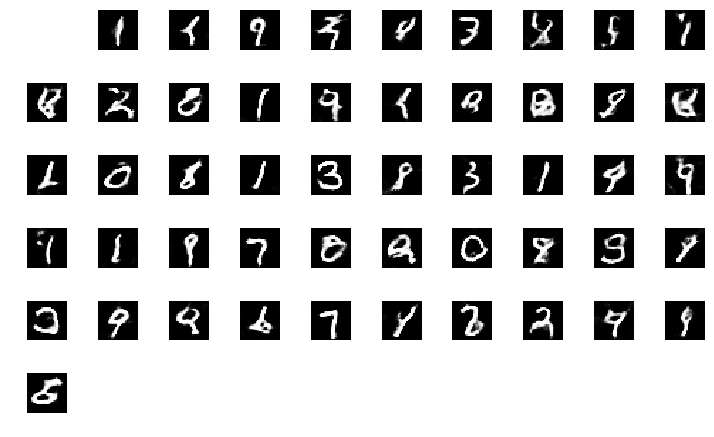

epochs and loss 10 160.56200179457664 192.74890714883804


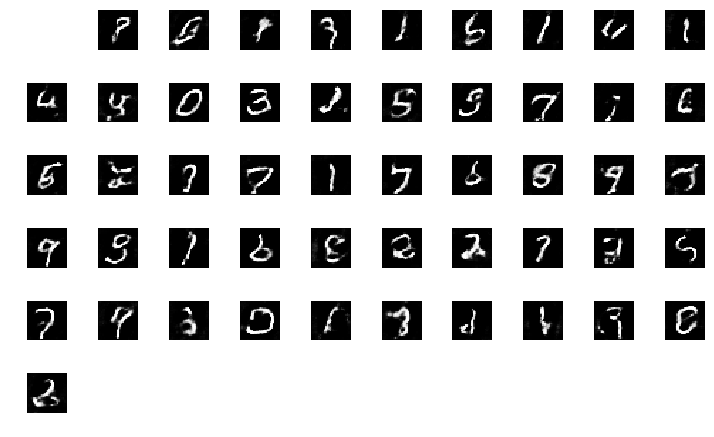

epochs and loss 11 160.38475999236107 192.7707729935646


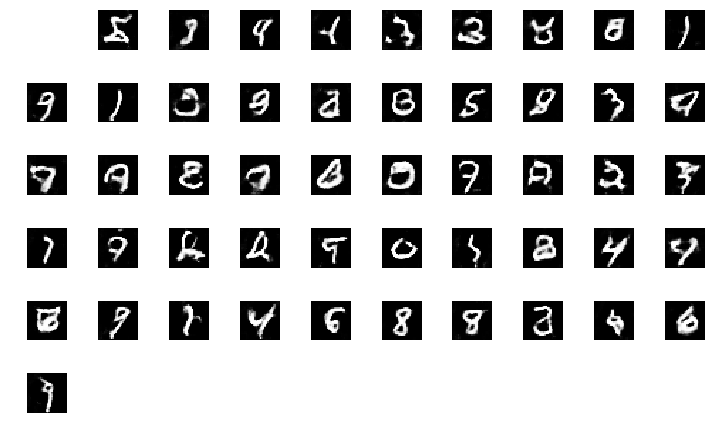

epochs and loss 12 160.46567168831825 192.54018080234528


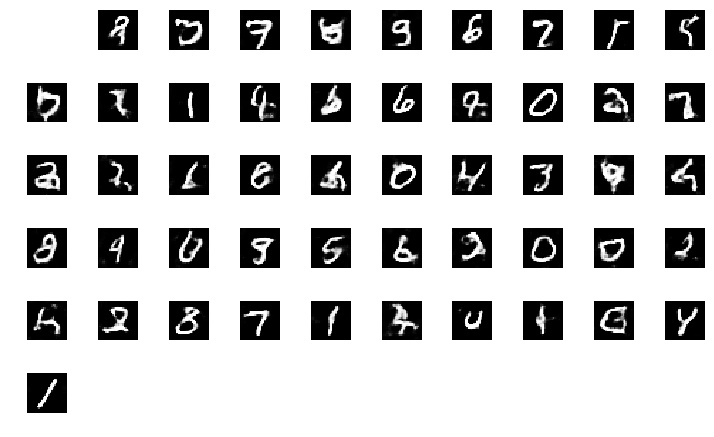

epochs and loss 13 160.46510910987854 192.46427553892136


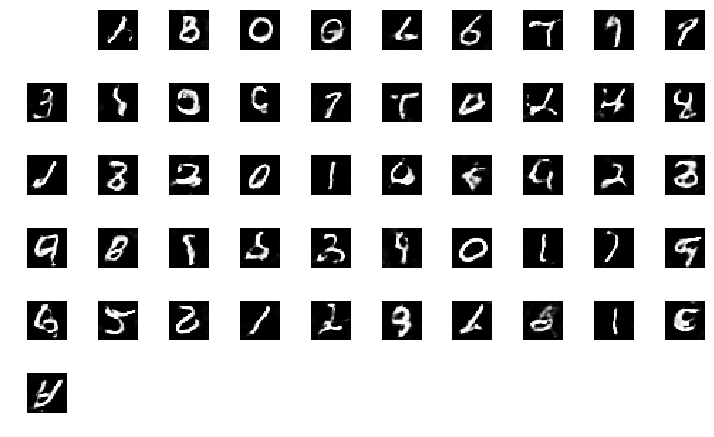

epochs and loss 14 160.3756648004055 192.677767932415


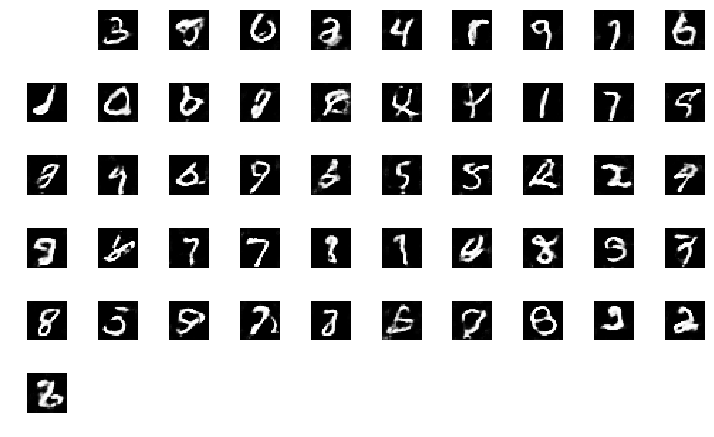

epochs and loss 15 160.336365878582 193.16454899311066


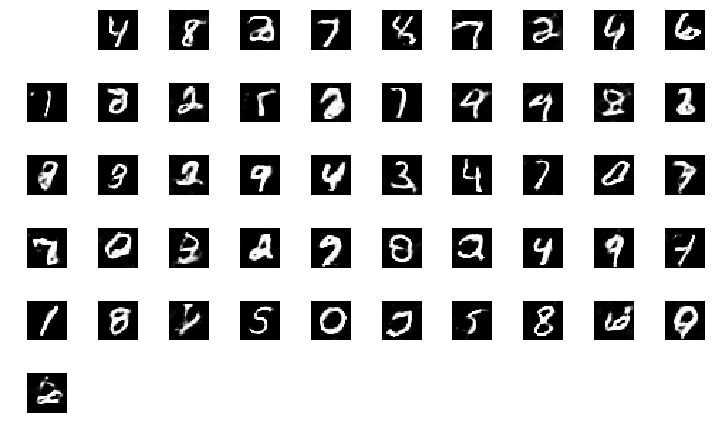

epochs and loss 16 160.2378402352333 193.61586672067642


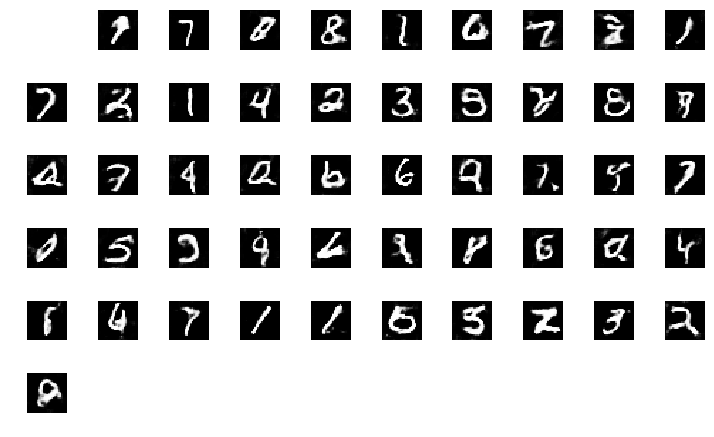

epochs and loss 17 160.09246909618378 195.49104458093643


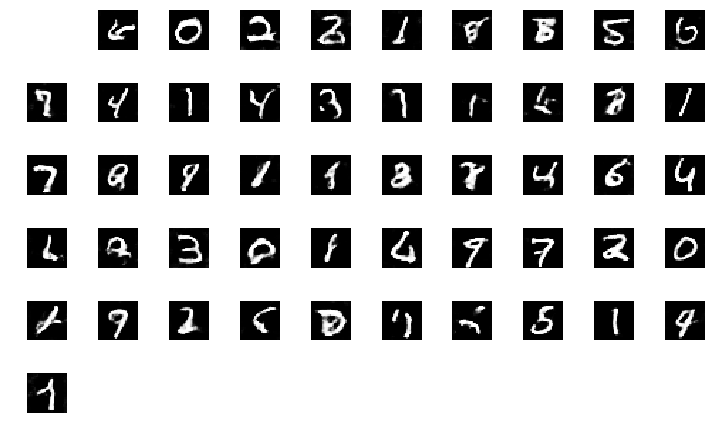

epochs and loss 18 160.02084910869598 194.3475602865219


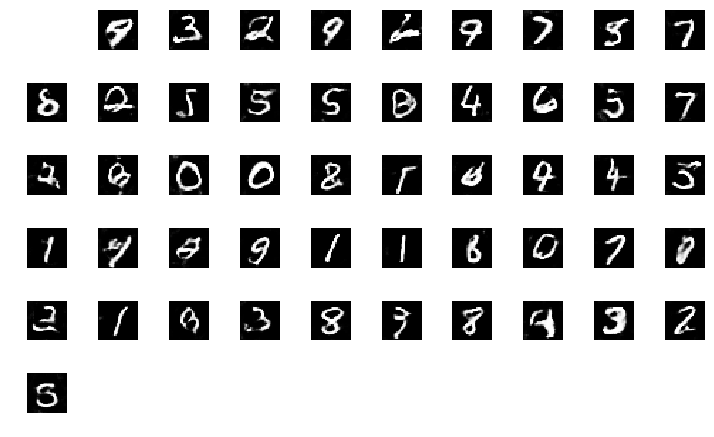

epochs and loss 19 159.95936986804008 194.1015381217003


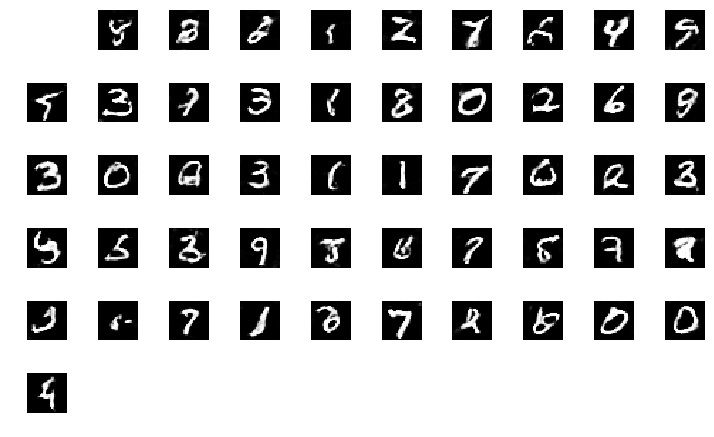

epochs and loss 20 159.8424568772316 195.98277360200882


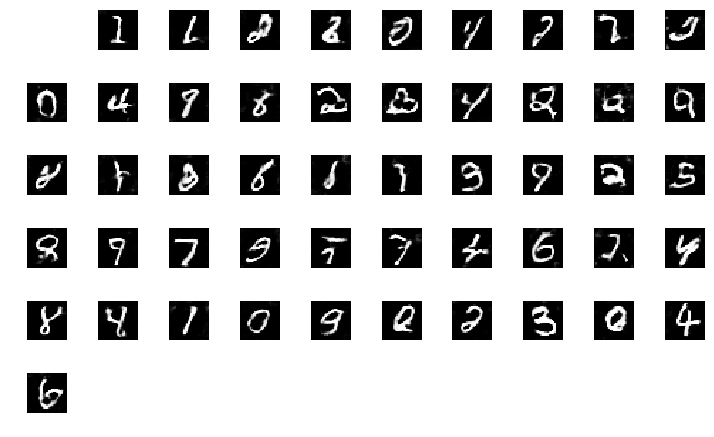

epochs and loss 21 159.77566787600517 195.33332628011703


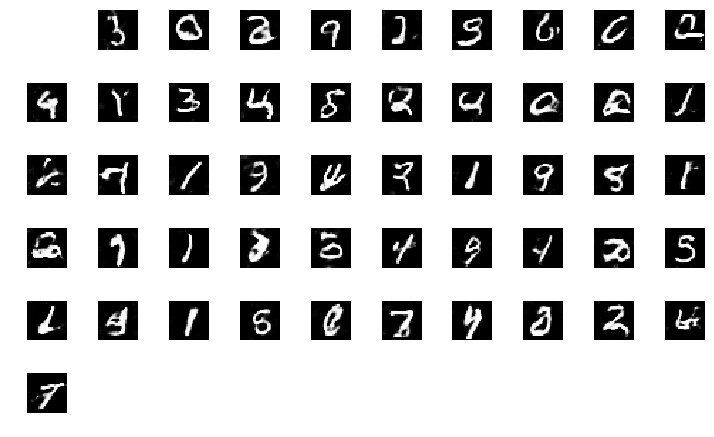

epochs and loss 22 159.65795850753784 196.29156160354614


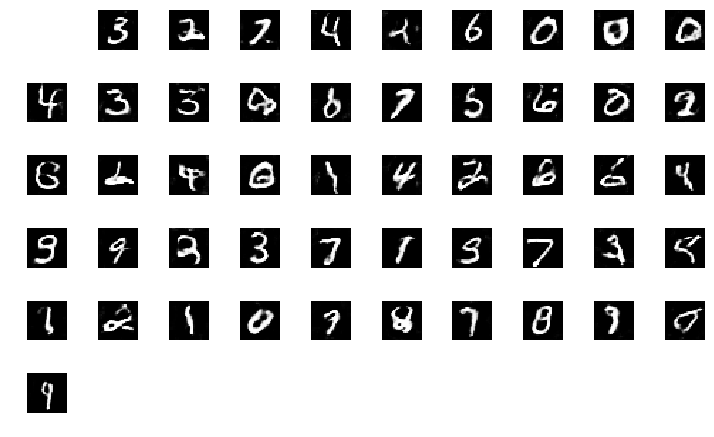

epochs and loss 23 159.62439069151878 196.12589299678802


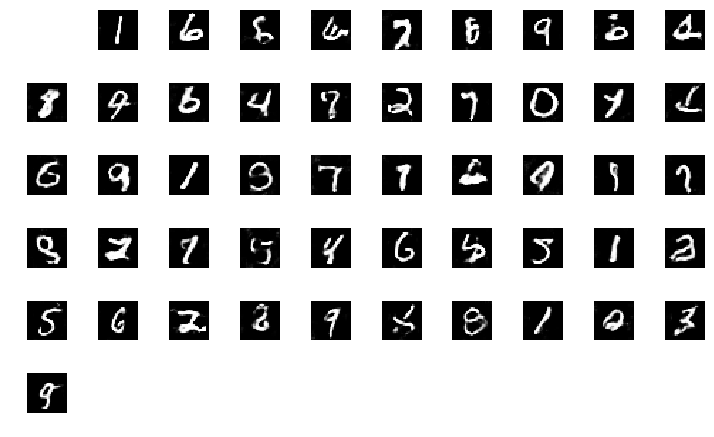

epochs and loss 24 159.49090883135796 197.13253331184387


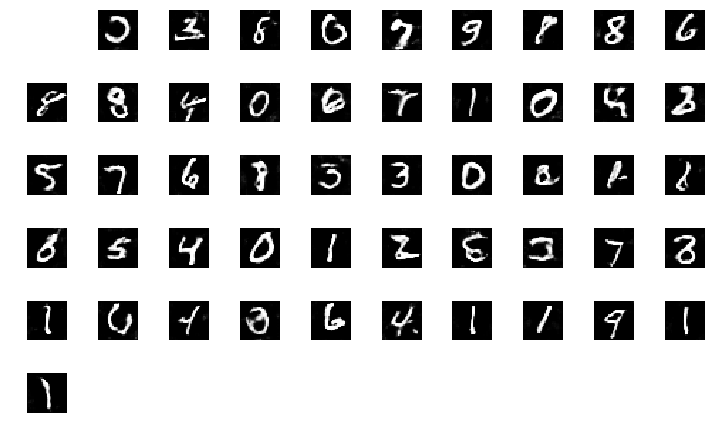

epochs and loss 25 159.34270280599594 197.47442269325256


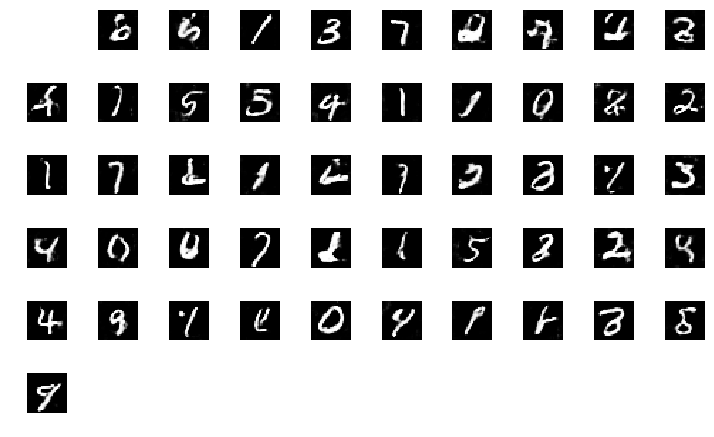

epochs and loss 26 159.20929896831512 198.26986247301102


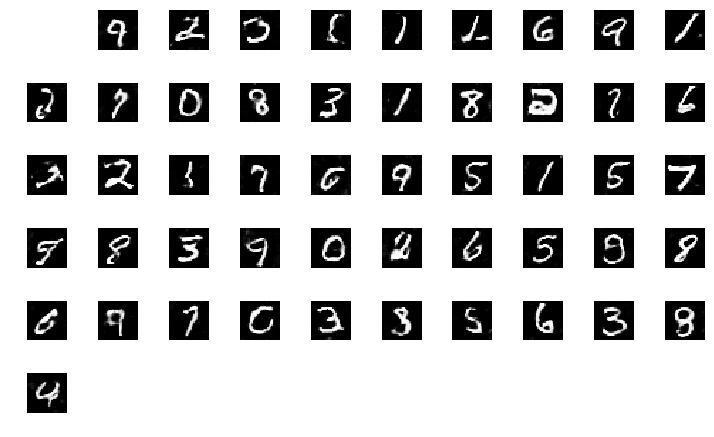

epochs and loss 27 159.13016653060913 198.45429581403732


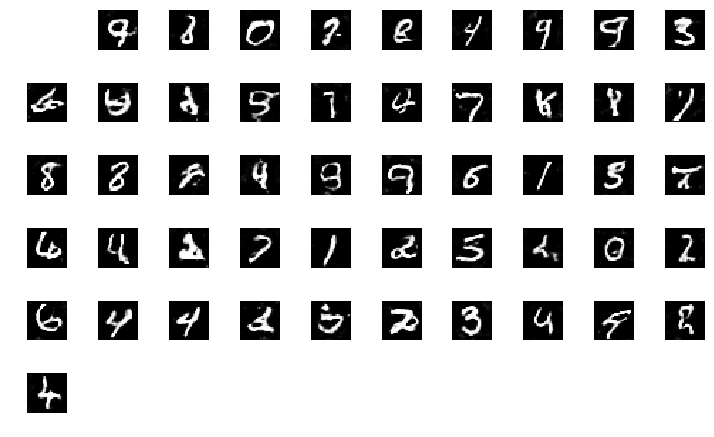

epochs and loss 28 158.94659313559532 198.67315089702606


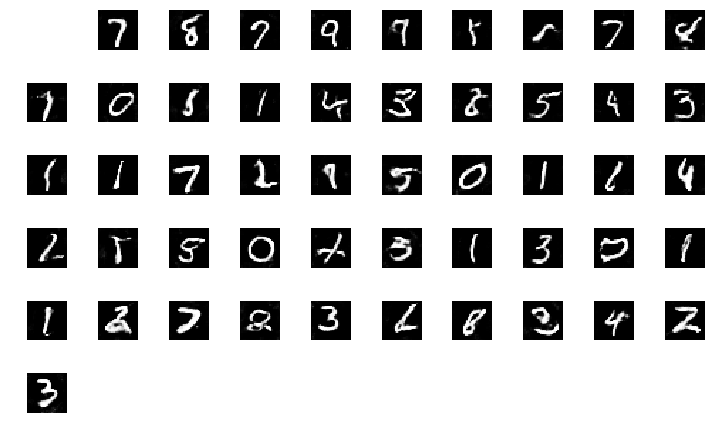

epochs and loss 29 158.83326533436775 199.03422129154205


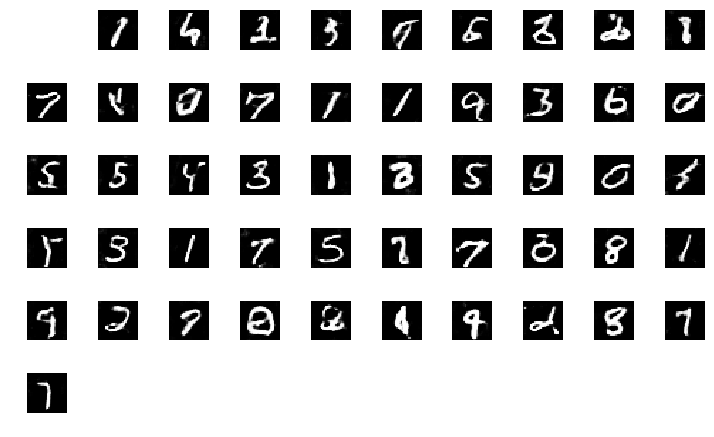

epochs and loss 30 158.74841278791428 200.10944610834122


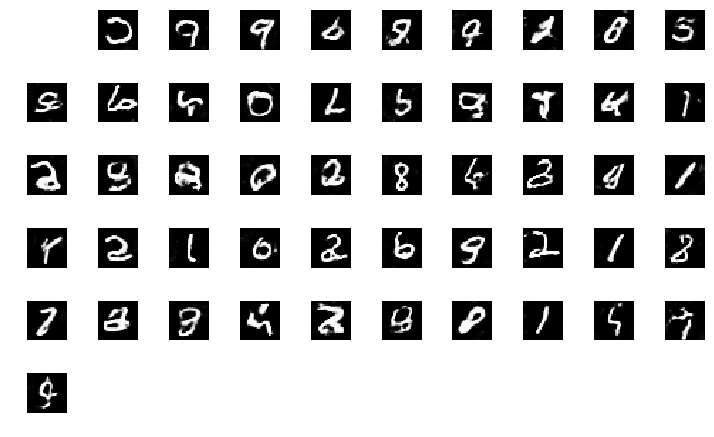

epochs and loss 31 158.59389919042587 200.48066991567612


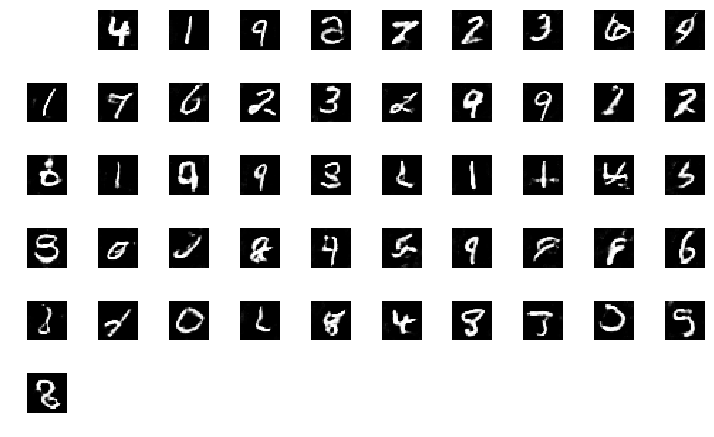

epochs and loss 32 158.4077240228653 200.89006024599075


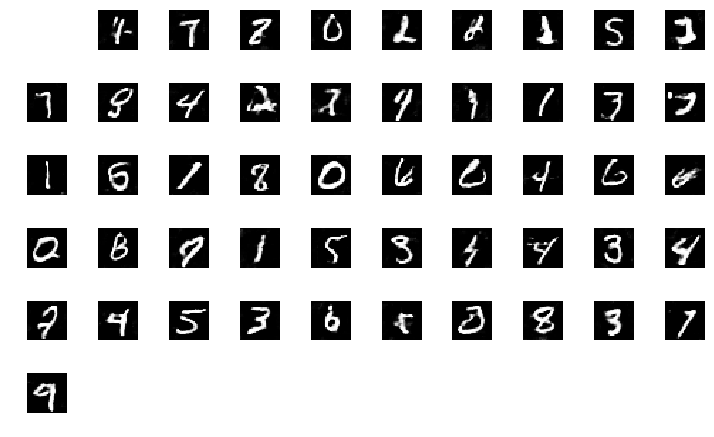

epochs and loss 33 158.1838558614254 201.9774164557457


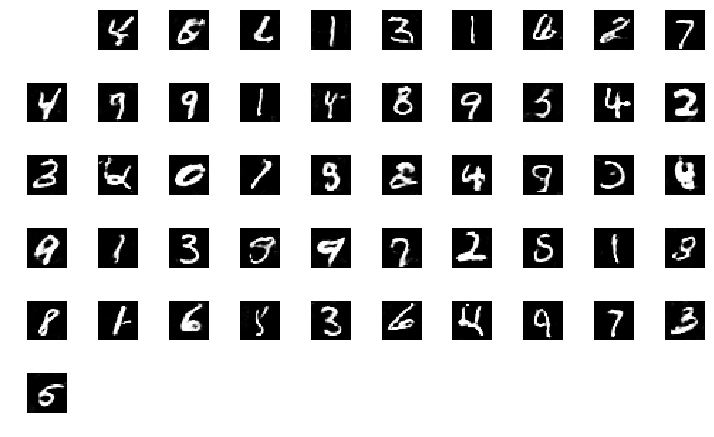

epochs and loss 34 158.09933471679688 202.26103591918945


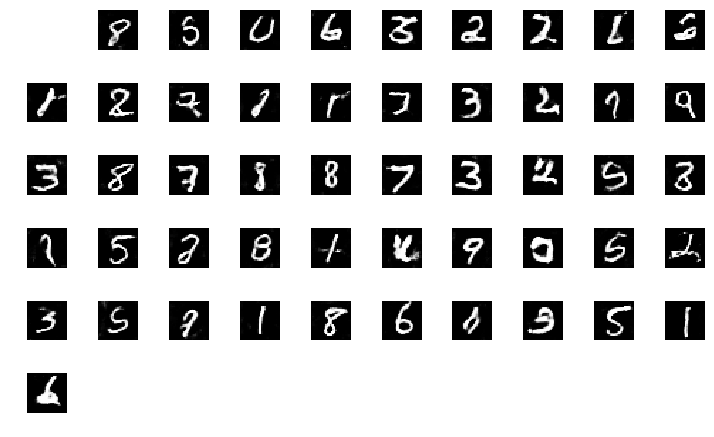

epochs and loss 35 157.8901107609272 203.24541747570038


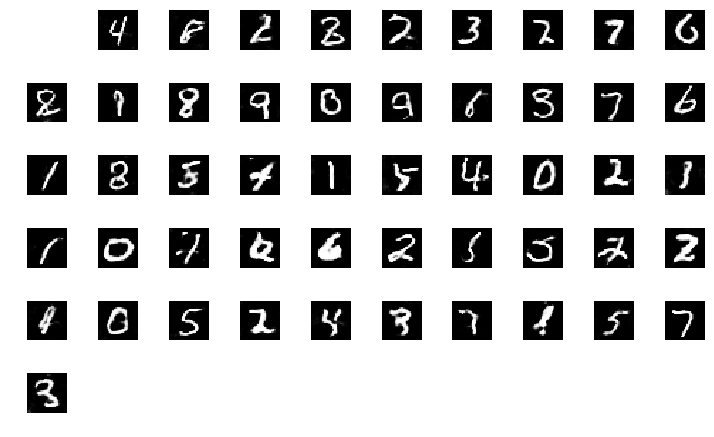

epochs and loss 36 157.74741286039352 203.6059917807579


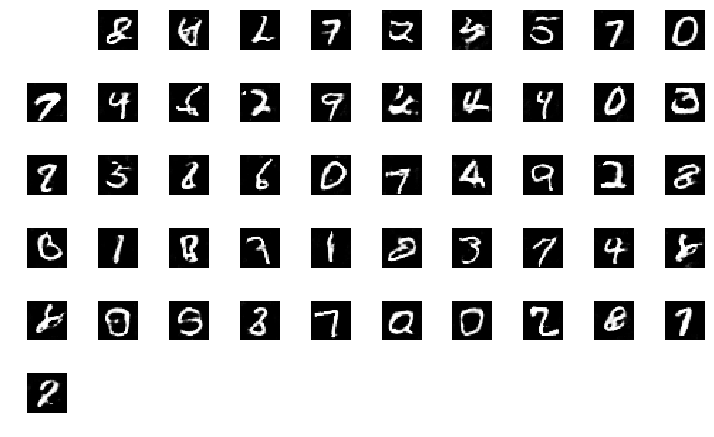

epochs and loss 37 157.46807274222374 204.30483430624008


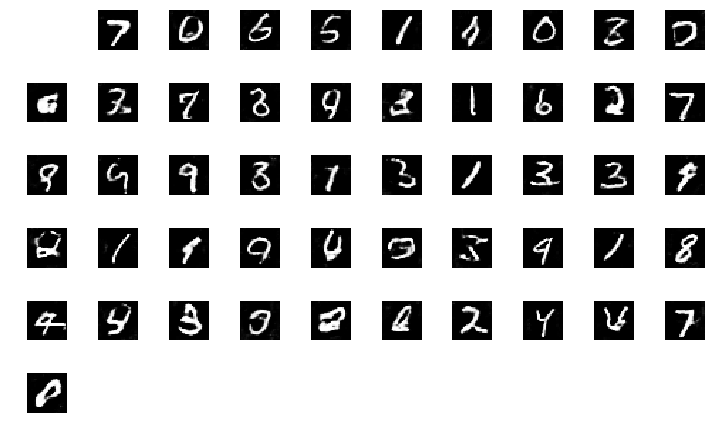

epochs and loss 38 157.33964186906815 205.41641134023666


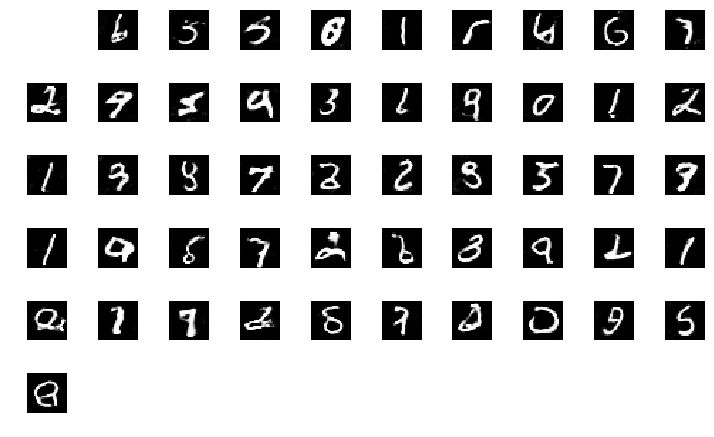

epochs and loss 39 157.06698441505432 206.15514385700226


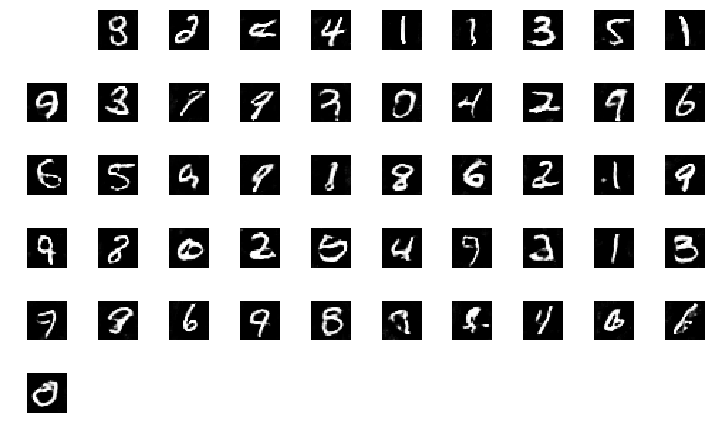

epochs and loss 40 156.8470167517662 207.24437630176544


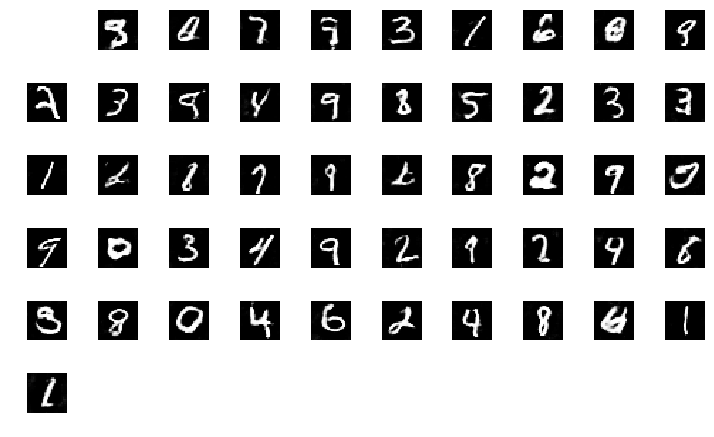

epochs and loss 41 156.764163762331 207.8416382074356


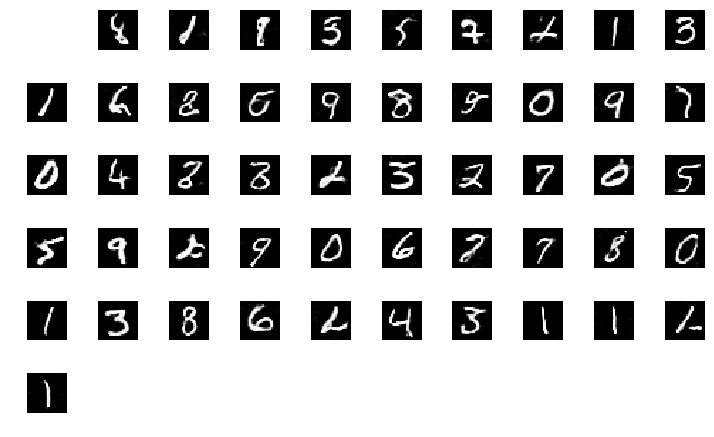

epochs and loss 42 156.52168983221054 209.04585152864456


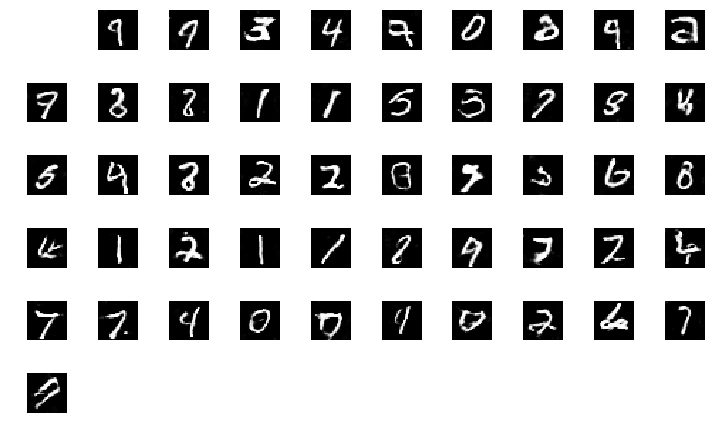

epochs and loss 43 156.47070303559303 209.29913240671158


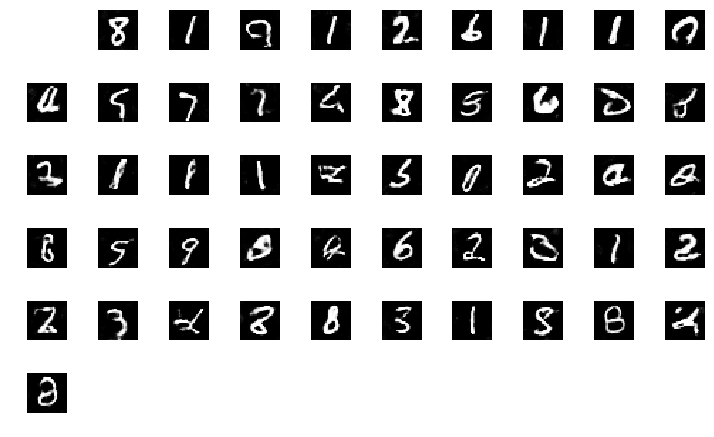

epochs and loss 44 156.17562353610992 209.89793014526367


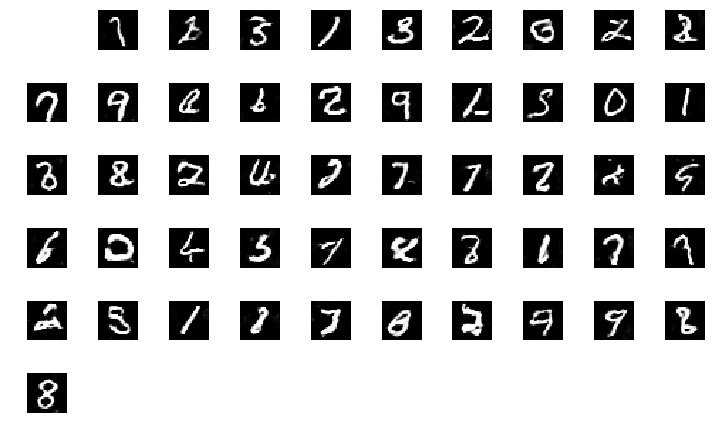

epochs and loss 45 156.22914531826973 210.90972286462784


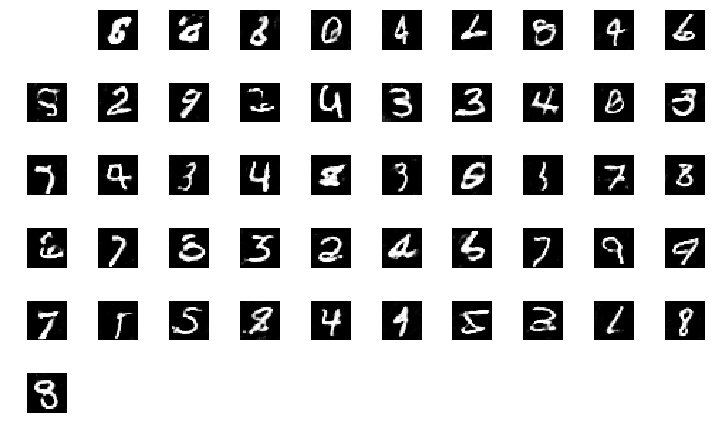

epochs and loss 46 155.73389926552773 211.87520456314087


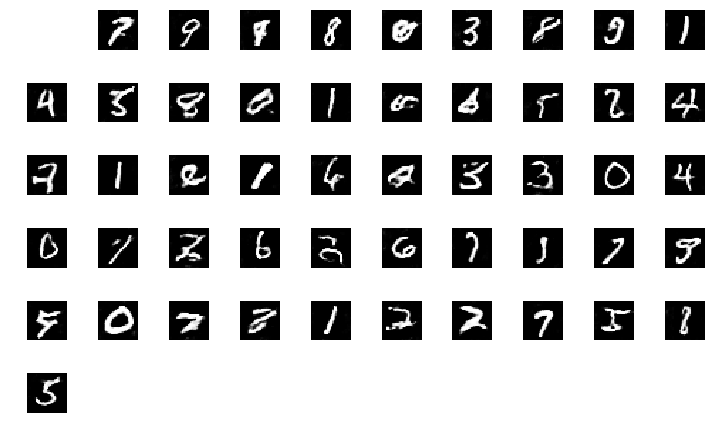

epochs and loss 47 155.61816716194153 212.63330209255219


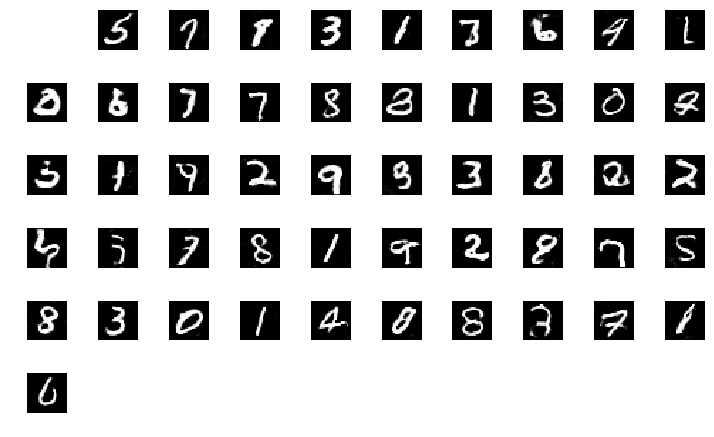

epochs and loss 48 155.2264820933342 213.8478800058365


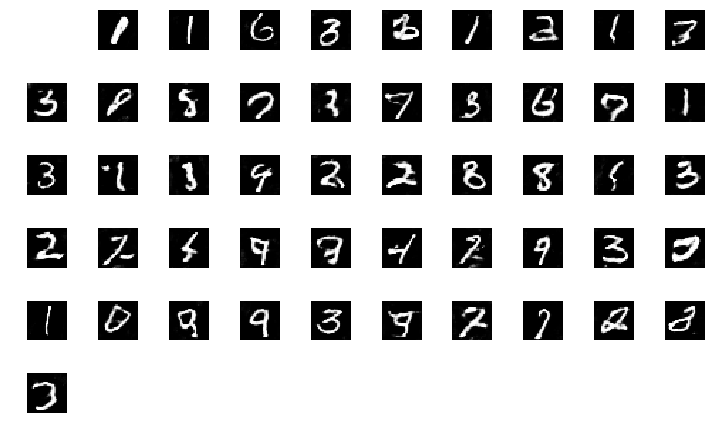

epochs and loss 49 155.25028535723686 214.47176373004913


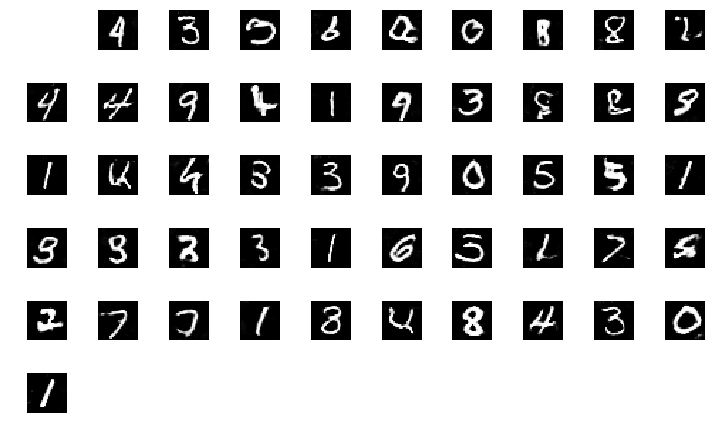

In [64]:
for epoch in range(total_epochs):
    epochs_d_loss=0.0
    epoch_g_loss=0.0
    for step in range(No_of_Batch):
        idx=np.random.randint(0,data.shape[0],helf_batch)
        real_imags=data[idx]
        
        noise=np.random.normal(0,1,size=(helf_batch,Noise_dim))
        fake_img=genrator.predict(noise)
        real_y=np.ones((helf_batch,1))*0.9
        fake_y=np.zeros((helf_batch,1))
        
        d_loss_real=discriminatore.train_on_batch(real_imags,real_y)
        d_loss_fake=discriminatore.train_on_batch(fake_img,fake_y)
        d_loss=0.5*d_loss_real+0.5*d_loss_fake 
        epochs_d_loss+=d_loss

        
        noise=np.random.normal(0,1,size=(batch_size,Noise_dim))
        real_y=np.ones((batch_size,1))
        g_loss=model.train_on_batch(noise,real_y)
        epoch_g_loss+=g_loss 
    print("epochs and loss",epoch,epochs_d_loss,epoch_g_loss)
    noise=np.random.normal(0.1,size=(50,Noise_dim))
    f=genrator.predict(noise).reshape((50,28,28))
    c=1
    plt.figure(figsize=(10,10))
    for ix in f:
      plt.subplot(10,10,c+1)
      plt.imshow(ix,interpolation='nearest',cmap='gray')
      plt.axis('off')
      c=c+1
    plt.tight_layout()
    plt.savefig('image'+str(epoch)+'.png')
    plt.show()
